In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimpleStew/'

In [3]:
final_df=pd.read_csv('SimpleStew_MS_PerStep.csv')

In [4]:
filtered_tomato = final_df[final_df['Step'].str.strip() == 'Add Tomtato']
filtered_tomato
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
5,C001,36,Add Tomtato,327.683900,393.891177,421.349493,372.080950,534.877430,1203.602812,0.000000,0.000000
15,C003,58,Add Tomtato,250.908024,284.972133,284.543720,392.954786,394.183705,1164.539144,777.323767,535.493811
25,C006,42,Add Tomtato,137.554449,292.522962,297.478422,222.144245,357.139249,1144.092457,582.568224,502.170734
35,C008,34,Add Tomtato,534.672787,641.997731,985.654779,776.299903,1146.152361,1622.516570,1321.637857,935.817569
44,C009,24,Add Tomtato,451.364274,575.407165,664.991445,555.346191,697.523323,1703.799053,1329.495930,926.331470
54,C012,54,Add Tomtato,183.311747,242.273252,250.696526,196.161621,252.344016,1383.085429,887.716949,549.527433
63,C013,48,Add Tomtato,561.596475,644.710724,864.969294,808.711832,1153.162999,1091.067796,988.353981,805.611137
72,C016,39,Add Tomtato,141.033597,289.054550,487.846186,349.765318,651.565978,828.996996,580.051229,377.989399
82,C017,36,Add Tomtato,343.463921,466.145582,586.153305,467.016411,659.137626,1320.842585,973.924385,657.861979
92,C020,30,Add Tomtato,405.865918,548.718495,366.705711,409.731268,434.856843,1515.597054,1131.609960,802.384096


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_tomato = filtered_tomato.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_tomato.select_dtypes(include=['float64', 'int64']).columns
filtered_tomato[numerical_cols] = filtered_tomato[numerical_cols].replace(0, np.nan)

filtered_tomato[numerical_cols] = imputer.fit_transform(filtered_tomato[numerical_cols])
filtered_tomato

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
5,C001,36.0,Add Tomtato,327.683900,393.891177,421.349493,372.080950,534.877430,1203.602812,777.323767,535.493811
15,C003,58.0,Add Tomtato,250.908024,284.972133,284.543720,392.954786,394.183705,1164.539144,777.323767,535.493811
25,C006,42.0,Add Tomtato,137.554449,292.522962,297.478422,222.144245,357.139249,1144.092457,582.568224,502.170734
35,C008,34.0,Add Tomtato,534.672787,641.997731,985.654779,776.299903,1146.152361,1622.516570,1321.637857,935.817569
44,C009,24.0,Add Tomtato,451.364274,575.407165,664.991445,555.346191,697.523323,1703.799053,1329.495930,926.331470
54,C012,54.0,Add Tomtato,183.311747,242.273252,250.696526,196.161621,252.344016,1383.085429,887.716949,549.527433
63,C013,48.0,Add Tomtato,561.596475,644.710724,864.969294,808.711832,1153.162999,1091.067796,988.353981,805.611137
72,C016,39.0,Add Tomtato,141.033597,289.054550,487.846186,349.765318,651.565978,828.996996,580.051229,377.989399
82,C017,36.0,Add Tomtato,343.463921,466.145582,586.153305,467.016411,659.137626,1320.842585,973.924385,657.861979
92,C020,30.0,Add Tomtato,405.865918,548.718495,366.705711,409.731268,434.856843,1515.597054,1131.609960,802.384096


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Tomato',
    'HeadCamera Distance': 'HeadCamera Distance - Add Tomato',
    'LeftElbow Distance': 'LeftElbow Distance - Add Tomato',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Tomato',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Tomato',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Tomato',
    'RightElbow Distance': 'RightElbow Distance - Add Tomato',
    'RightShoulder Distance': 'RightShoulder Distance - Add Tomato'
}

# Rename columns
filtered_tomato = filtered_tomato.rename(columns=new_column_names)
filtered_tomato

,Participant,Block Design Raw Score,Step,Chest Distance - Add Tomato,HeadCamera Distance - Add Tomato,LeftElbow Distance - Add Tomato,LeftShoulder Distance - Add Tomato,MotionControllerLeft Distance - Add Tomato,MotionControllerRight Distance - Add Tomato,RightElbow Distance - Add Tomato,RightShoulder Distance - Add Tomato
5,C001,36.0,Add Tomtato,327.683900,393.891177,421.349493,372.080950,534.877430,1203.602812,777.323767,535.493811
15,C003,58.0,Add Tomtato,250.908024,284.972133,284.543720,392.954786,394.183705,1164.539144,777.323767,535.493811
25,C006,42.0,Add Tomtato,137.554449,292.522962,297.478422,222.144245,357.139249,1144.092457,582.568224,502.170734
35,C008,34.0,Add Tomtato,534.672787,641.997731,985.654779,776.299903,1146.152361,1622.516570,1321.637857,935.817569
44,C009,24.0,Add Tomtato,451.364274,575.407165,664.991445,555.346191,697.523323,1703.799053,1329.495930,926.331470
54,C012,54.0,Add Tomtato,183.311747,242.273252,250.696526,196.161621,252.344016,1383.085429,887.716949,549.527433
63,C013,48.0,Add Tomtato,561.596475,644.710724,864.969294,808.711832,1153.162999,1091.067796,988.353981,805.611137
72,C016,39.0,Add Tomtato,141.033597,289.054550,487.846186,349.765318,651.565978,828.996996,580.051229,377.989399
82,C017,36.0,Add Tomtato,343.463921,466.145582,586.153305,467.016411,659.137626,1320.842585,973.924385,657.861979
92,C020,30.0,Add Tomtato,405.865918,548.718495,366.705711,409.731268,434.856843,1515.597054,1131.609960,802.384096


In [7]:
tracker_columns = ['Chest Distance - Add Tomato', 'HeadCamera Distance - Add Tomato', 'LeftElbow Distance - Add Tomato', 'LeftShoulder Distance - Add Tomato',
                   'RightElbow Distance - Add Tomato', 'RightShoulder Distance - Add Tomato', 'MotionControllerLeft Distance - Add Tomato',
                   'MotionControllerRight Distance - Add Tomato']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_tomato, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_tomato[block_design_col], filtered_tomato[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_tomato, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Tomato,-0.502689,0.056155
1,HeadCamera Distance - Add Tomato,-0.619519,0.013774
2,LeftElbow Distance - Add Tomato,-0.610566,0.015625
3,LeftShoulder Distance - Add Tomato,-0.633843,0.011170
4,RightElbow Distance - Add Tomato,-0.552868,0.032553
5,RightShoulder Distance - Add Tomato,-0.474015,0.074254
6,MotionControllerLeft Distance - Add Tomato,-0.535365,0.039721
7,MotionControllerRight Distance - Add Tomato,-0.603404,0.017239


In [8]:
#filtered_tomato.to_csv('SimpleStew_AddTomato.csv',index=False)

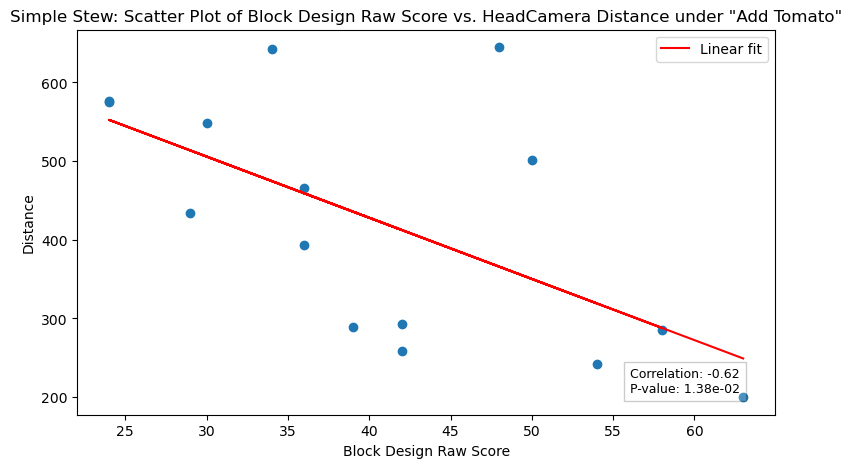

In [9]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['HeadCamera Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['HeadCamera Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['HeadCamera Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '33 SS_TomatoDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

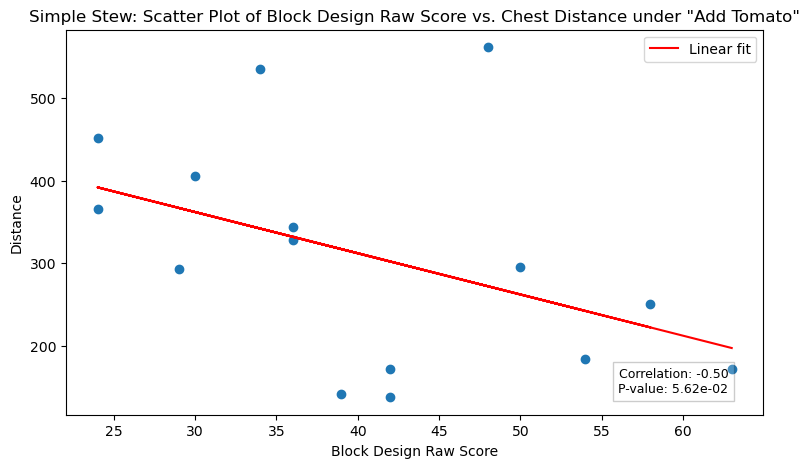

In [10]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['Chest Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['Chest Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['Chest Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Chest Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '34 SS_TomatoDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

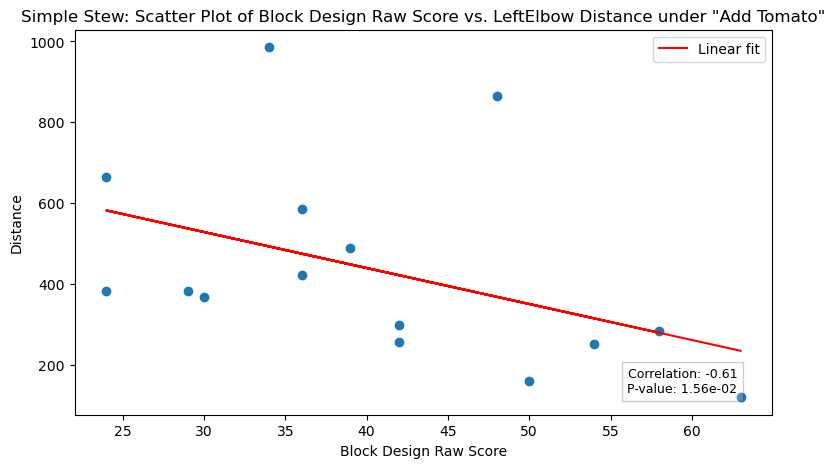

In [11]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftElbow Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftElbow Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftElbow Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '35 SS_TomatoDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

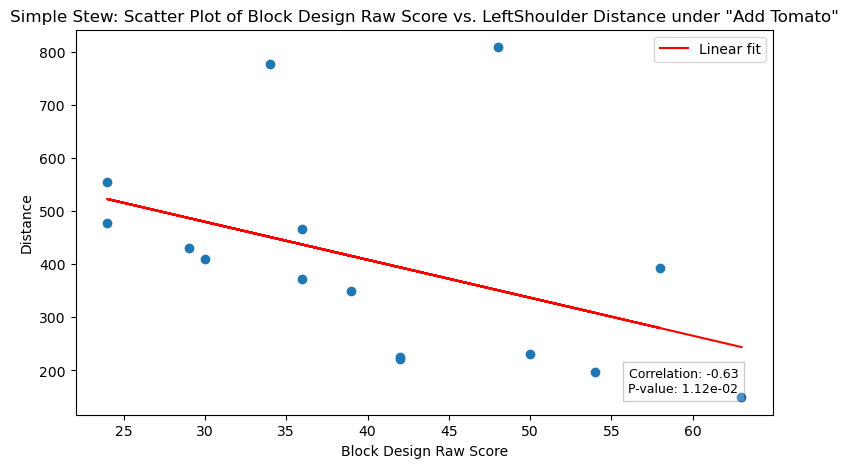

In [12]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftShoulder Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftShoulder Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftShoulder Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '36 SS_TomatoDistanceLeftShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

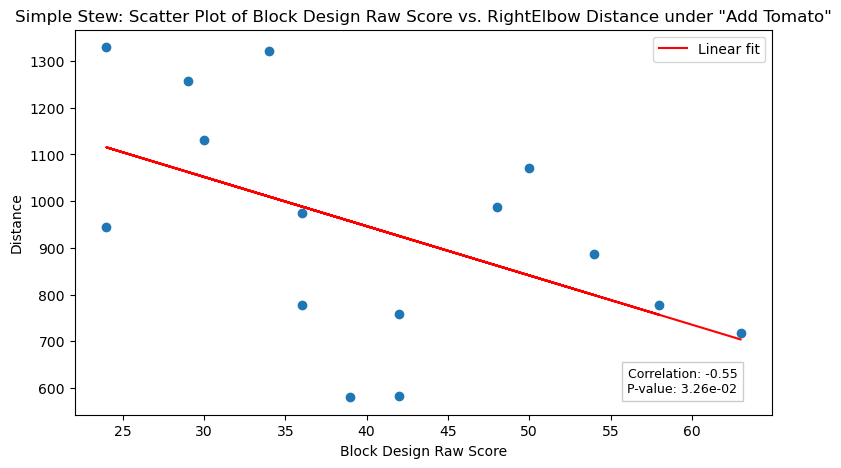

In [13]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightElbow Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightElbow Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightElbow Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '37 SS_TomatoDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

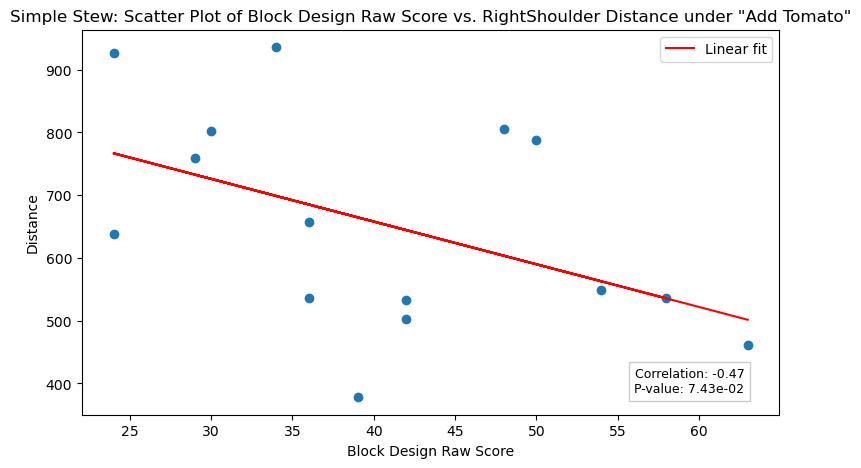

In [14]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightShoulder Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightShoulder Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightShoulder Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '38 SS_TomatoDistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

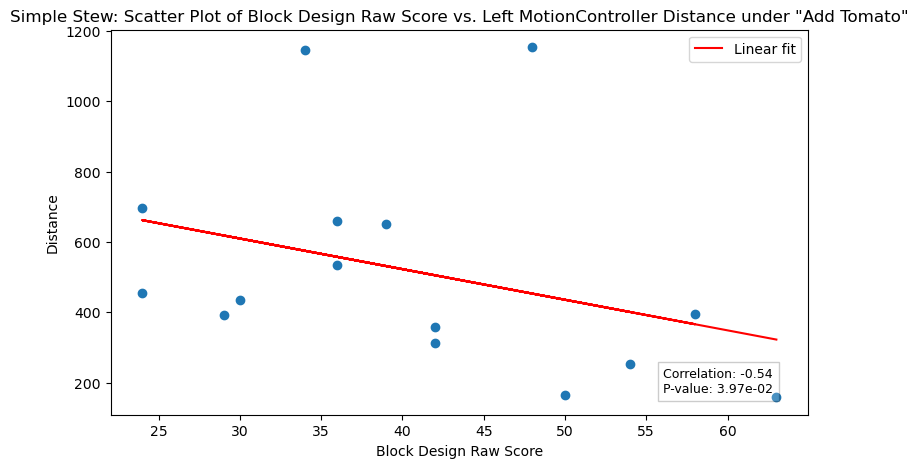

In [15]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerLeft Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerLeft Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerLeft Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '39 SS_TomatoDistanceLeftContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

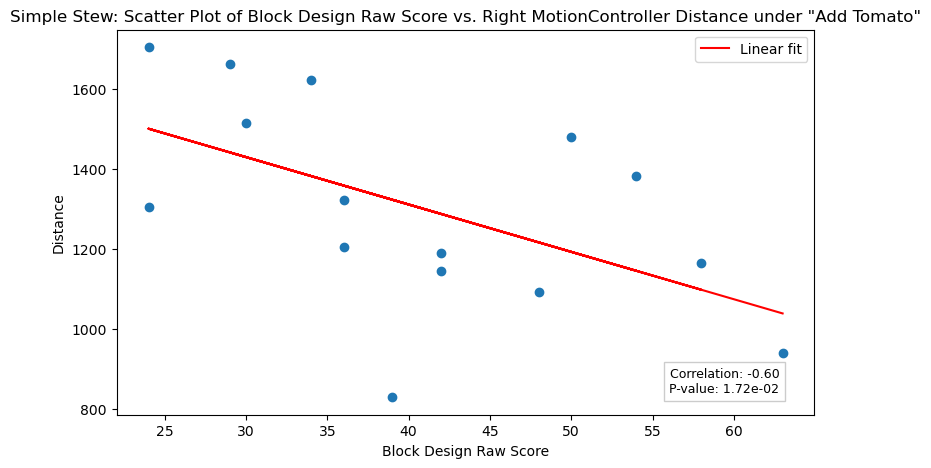

In [16]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerRight Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerRight Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerRight Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '40 SS_TomatoDistanceRightContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()